<h1>Exploring Toronto with segmentation and clustering

<h1 align=center><font size = 5>Segmenting and Clustering Places in the Neighborhood</font></h1>

## Table of Contents

<div class="alert alert-block alert-info" style="margin-top: 20px">

<font size = 3>

1. <a href="#item1">Download and Explore Dataset</a>

2. <a href="#item2">Explore Neighborhoods in a filtered Place</a>

3. <a href="#item3">Analyze Each Neighborhood</a>

4. <a href="#item4">Cluster Neighborhoods</a>

5. <a href="#item5">Examine Clusters</a>    
</font>
</div>

Before we get the data and start exploring it, let's download all the dependencies that we will need.

In [154]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt
#%matplotlib inline 

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Libraries imported.


<a id='item1'></a>

## 1. Download and Explore Dataset

Need a dataset that contains the boroughs and the neighborhoods that exist in each borough as well as the the latitude and logitude coordinates of each neighborhood. 


GET THE DATA

<h2>Step 1 : scrape data from web page

<h3>import pandas and beautiful soup to scrape web page

In [155]:
#import pandas as pd
import requests
from bs4 import BeautifulSoup

In [156]:
res = requests.get("https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M")

In [157]:
soup = BeautifulSoup(res.content,'lxml')


In [158]:
table = soup.find_all('table')[0] 

In [159]:
places = pd.read_html(str(table))[0]

In [160]:
places.head(15)

,Postal Code,Borough,Neighborhood
0,M1A,Not assigned,Not assigned
1,M2A,Not assigned,Not assigned
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park, Harbourfront"
5,M6A,North York,"Lawrence Manor, Lawrence Heights"
6,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"
7,M8A,Not assigned,Not assigned
8,M9A,Etobicoke,"Islington Avenue, Humber Valley Village"
9,M1B,Scarborough,"Malvern, Rouge"


REMOVE ALL BOROUGHS THAT ARE NOT ASSIGNED

In [161]:

indexNames = places[ places['Borough'] == "Not assigned"  ].index
 
# Delete these row indexes from dataFrame axis=0 is default
places.drop(indexNames , inplace=True)


In [162]:
places.head(5)

,Postal Code,Borough,Neighborhood
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park, Harbourfront"
5,M6A,North York,"Lawrence Manor, Lawrence Heights"
6,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"


CHECK FOR NOT ASSIGNED NEIGHBORHOODS --- THERE ARE NONE

In [163]:
#select neighborhoods that are unassinged
dfunassn = places[places['Neighborhood'] == "Not assigned"]
dfunassn

,Postal Code,Borough,Neighborhood


In [164]:
#DOUBLE CHECK FOR NOT ASSINGED BY PRINTING THE FULL LIST
pd.set_option('display.max_rows', places.shape[0]+1)
#print(df)
places

,Postal Code,Borough,Neighborhood
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park, Harbourfront"
5,M6A,North York,"Lawrence Manor, Lawrence Heights"
6,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"
8,M9A,Etobicoke,"Islington Avenue, Humber Valley Village"
9,M1B,Scarborough,"Malvern, Rouge"
11,M3B,North York,Don Mills
12,M4B,East York,"Parkview Hill, Woodbine Gardens"
13,M5B,Downtown Toronto,"Garden District, Ryerson"


In [165]:
places.shape

(103, 3)

<h2>Step 2 : Geocoding

<h3>Cannot get actual Geocoding to work for postal codes and just loaded csv


#LOAD IN CSV  -  this downloads file-Geospatial_Coordinates.csv onto a local disk

In [166]:
#skip after downloading the first time
#import wget
#url = 'http://cocl.us/Geospatial_data'
#filename = wget.download(url, out= r'C:\Users\Joe\JoeJupytrNbks')


In [167]:
LatLongData = pd.read_csv("Geospatial_Coordinates.csv", delimiter=",")
LatLongData[0:5]

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


In [168]:
neighborhoods = pd.merge(places, LatLongData, on='Postal Code')
neighborhoods.head()
#df_postalcoes_ll.head()

,Postal Code,Borough,Neighborhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494


In [169]:
#For information display and unused further inprogram
boroughslist = neighborhoods['Borough'].value_counts()
df_boroughslist = pd.DataFrame(boroughslist)
df_boroughslist

,Borough
North York,24
Downtown Toronto,19
Scarborough,17
Etobicoke,12
Central Toronto,9
West Toronto,6
York,5
East York,5
East Toronto,5
Mississauga,1


In [170]:
print('The dataframe has {} boroughs and {} neighborhoods.'.format(
        len(neighborhoods['Borough'].unique()),
        neighborhoods.shape[0]
    )
)

The dataframe has 10 boroughs and 103 neighborhoods.


#### Use geopy library to get the latitude and longitude values of the City you selected.

In order to define an instance of the geocoder, we need to define a user_agent. We will name our agent <em>ny_explorer</em>, as shown below.

In [171]:
address = 'Toronto, ON'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
LocLat = location.latitude
LocLon = location.longitude
print('The geograpical coordinate of {} are {}, {}.'.format(address, LocLat, LocLon))

The geograpical coordinate of Toronto, ON are 43.6534817, -79.3839347.


#### Create a map of your place with neighborhoods superimposed on top.

In [172]:
# create map of your Location using latitude and longitude values
map_location = folium.Map(location=[LocLat, LocLon], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(neighborhoods['Latitude'], neighborhoods['Longitude'], neighborhoods['Borough'], neighborhoods['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_location)  
    
map_location

**Folium** is a great visualization library. Feel free to zoom into the above map, and click on each circle mark to reveal the name of the neighborhood and its respective borough.

slice the original dataframe and create a new dataframe of the smaller area, like one borough.

In [174]:
boro_select = 'Toronto'

#boro_filt_data = neighborhoods[neighborhoods['Borough'] == boro_select].reset_index(drop=True)
boro_filt_data = neighborhoods[neighborhoods['Borough'].str.contains(boro_select)].reset_index(drop=True)

boro_filt_data.head()

,Postal Code,Borough,Neighborhood,Latitude,Longitude
0,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
1,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494
2,M5B,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937
3,M5C,Downtown Toronto,St. James Town,43.651494,-79.375418
4,M4E,East Toronto,The Beaches,43.676357,-79.293031


<h2>USER INPUT required - Type in name of borough get the geographical coordinates

In [175]:
address = 'Downtown Toronto, ON'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of {} are {}, {}.'.format(address, latitude, longitude))

The geograpical coordinate of Downtown Toronto, ON are 43.6563221, -79.3809161.


visualize filtered place and the neighborhoods in it.

In [176]:
# create map of filtered Boroougha area using latitude and longitude values
map_filtboro = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(boro_filt_data['Latitude'], boro_filt_data['Longitude'], boro_filt_data['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_filtboro)  
    
map_filtboro

Next, we are going to start utilizing the Foursquare API to explore the neighborhoods and segment them.

#### Define Foursquare Credentials and Version

In [177]:
CLIENT_ID = 'TE0PG2YHTFN3QLWZM5ET0O0EGQX1XNEJJECQRZJVWXAG4G10' # your Foursquare ID
CLIENT_SECRET = 'CWPXUWBN55NCV0IBFRH3VPMX4JZM4UOKLXL2VWAZT0HU01FM' # your Foursquare Secret
VERSION = '20180605'


print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: TE0PG2YHTFN3QLWZM5ET0O0EGQX1XNEJJECQRZJVWXAG4G10
CLIENT_SECRET:CWPXUWBN55NCV0IBFRH3VPMX4JZM4UOKLXL2VWAZT0HU01FM


#### Let's explore the first neighborhood in our dataframe.

Get the neighborhood's name.

In [178]:
boro_filt_data.loc[0, 'Neighborhood']

'Regent Park, Harbourfront'

Get the neighborhood's latitude and longitude values.

In [179]:
neighborhood_latitude = boro_filt_data.loc[0, 'Latitude'] # neighborhood latitude value
neighborhood_longitude = boro_filt_data.loc[0, 'Longitude'] # neighborhood longitude value

neighborhood_name = boro_filt_data.loc[0, 'Neighborhood'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of Regent Park, Harbourfront are 43.6542599, -79.3606359.


#### Now, let's get the top 100 venues that are in Regent Park within a radius of 500 meters.

First, let's create the GET request URL. Name your URL **url**.

In [180]:
# parameters needed for foursquare url
LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 500 # define radius

In [181]:
# create URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)
url # display URL

'https://api.foursquare.com/v2/venues/explore?&client_id=TE0PG2YHTFN3QLWZM5ET0O0EGQX1XNEJJECQRZJVWXAG4G10&client_secret=CWPXUWBN55NCV0IBFRH3VPMX4JZM4UOKLXL2VWAZT0HU01FM&v=20180605&ll=43.6542599,-79.3606359&radius=500&limit=100'

Send the GET request and examine the resutls

In [182]:
results = requests.get(url).json()

# run check once and comment out
#results

From the Foursquare lab in the previous module, we know that all the information is in the *items* key. Before we proceed, let's borrow the **get_category_type** function from the Foursquare lab.

In [183]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

Now we are ready to clean the json and structure it into a *pandas* dataframe.

In [184]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

,name,categories,lat,lng
0,Roselle Desserts,Bakery,43.653447,-79.362017
1,Tandem Coffee,Coffee Shop,43.653559,-79.361809
2,Morning Glory Cafe,Breakfast Spot,43.653947,-79.361149
3,Cooper Koo Family YMCA,Distribution Center,43.653249,-79.358008
4,Body Blitz Spa East,Spa,43.654735,-79.359874


List number of venues in Regent Park returned by Foursquare?

In [195]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

43 venues were returned by Foursquare.


<a id='item2'></a>

## 2. Explore Neighborhoods in filtered Borough area

#### Define function to repeat the venue data process to all the neighborhoods in filtered borough

In [196]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

#### Run nearby_venue function for all neighborhood in filtered borough area

In [197]:
# get venue data for you filtered place

boro_filt_venues = getNearbyVenues(names=boro_filt_data['Neighborhood'],
                                   latitudes=boro_filt_data['Latitude'],
                                   longitudes=boro_filt_data['Longitude']
                                  )



Regent Park, Harbourfront
Queen's Park, Ontario Provincial Government
Garden District, Ryerson
St. James Town
The Beaches
Berczy Park
Central Bay Street
Christie
Richmond, Adelaide, King
Dufferin, Dovercourt Village
Harbourfront East, Union Station, Toronto Islands
Little Portugal, Trinity
The Danforth West, Riverdale
Toronto Dominion Centre, Design Exchange
Brockton, Parkdale Village, Exhibition Place
India Bazaar, The Beaches West
Commerce Court, Victoria Hotel
Studio District
Lawrence Park
Roselawn
Davisville North
Forest Hill North & West, Forest Hill Road Park
High Park, The Junction South
North Toronto West, Lawrence Park
The Annex, North Midtown, Yorkville
Parkdale, Roncesvalles
Davisville
University of Toronto, Harbord
Runnymede, Swansea
Moore Park, Summerhill East


KeyError: 'groups'

#### Let's check the size of the resulting dataframe

In [198]:
print(boro_filt_venues.shape)
boro_filt_venues.head()

(1614, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,"Regent Park, Harbourfront",43.65426,-79.360636,Roselle Desserts,43.653447,-79.362017,Bakery
1,"Regent Park, Harbourfront",43.65426,-79.360636,Tandem Coffee,43.653559,-79.361809,Coffee Shop
2,"Regent Park, Harbourfront",43.65426,-79.360636,Morning Glory Cafe,43.653947,-79.361149,Breakfast Spot
3,"Regent Park, Harbourfront",43.65426,-79.360636,Cooper Koo Family YMCA,43.653249,-79.358008,Distribution Center
4,"Regent Park, Harbourfront",43.65426,-79.360636,Body Blitz Spa East,43.654735,-79.359874,Spa


Let's check how many venues were returned for each neighborhood

In [199]:
boro_filt_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Berczy Park,56,56,56,56,56,56
"Brockton, Parkdale Village, Exhibition Place",23,23,23,23,23,23
"Business reply mail Processing Centre, South Central Letter Processing Plant Toronto",15,15,15,15,15,15
"CN Tower, King and Spadina, Railway Lands, Harbourfront West, Bathurst Quay, South Niagara, Island airport",18,18,18,18,18,18
Central Bay Street,64,64,64,64,64,64
Christie,16,16,16,16,16,16
Church and Wellesley,79,79,79,79,79,79
"Commerce Court, Victoria Hotel",100,100,100,100,100,100
Davisville,35,35,35,35,35,35


#### Let's find out how many unique categories can be curated from all the returned venues

In [200]:
print('There are {} uniques categories.'.format(len(boro_filt_venues['Venue Category'].unique())))

There are 241 uniques categories.


<a id='item3'></a>

## 3. Analyze Each Neighborhood

In [201]:
# one hot encoding
boro_filt_onehot = pd.get_dummies(boro_filt_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
boro_filt_onehot['Neighborhood'] = boro_filt_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [boro_filt_onehot.columns[-1]] + list(boro_filt_onehot.columns[:-1])
boro_filt_onehot = boro_filt_onehot[fixed_columns]

boro_filt_onehot.head()

,Yoga Studio,Afghan Restaurant,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Aquarium,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Stadium,Basketball Stadium,Beach,Bed & Breakfast,Beer Bar,Beer Store,Belgian Restaurant,Bistro,Boat or Ferry,Bookstore,Boutique,Brazilian Restaurant,Breakfast Spot,Brewery,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Line,Butcher,Café,Cajun / Creole Restaurant,Camera Store,Candy Store,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Arts Building,College Auditorium,College Cafeteria,College Gym,College Rec Center,Colombian Restaurant,Comfort Food Restaurant,Comic Shop,Concert Hall,Convenience Store,Convention Center,Cosmetics Shop,Coworking Space,Creperie,Cuban Restaurant,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food & Drink Shop,Food Court,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,General Travel,German Restaurant,Gift Shop,Gluten-free Restaurant,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Harbor / Marina,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Hobby Shop,Home Service,Hookah Bar,Hospital,Hostel,Hotel,Hotel Bar,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Korean Restaurant,Lake,Latin American Restaurant,Lawyer,Light Rail Station,Lingerie Store,Liquor Store,Lounge,Mac & Cheese Joint,Malay Restaurant,Market,Martial Arts Dojo,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Movie Theater,Museum,Music Venue,Neighborhood,New American Restaurant,Nightclub,Noodle House,Office,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Outdoor Sculpture,Park,Performing Arts Venue,Pet Store,Pharmacy,Pizza Place,Plane,Playground,Plaza,Poke Place,Portuguese Restaurant,Poutine Place,Pub,Ramen Restaurant,Record Shop,Recording Studio,Rental Car Location,Restaurant,Roof Deck,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shoe Store,Shopping Mall,Skate Park,Skating Rink,Smoke Shop,Smoothie Shop,Snack Place,Soup Place,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Sri Lankan Restaurant,Stadium,Stationery Store,Steakhouse,Strip Club,Supermarket,Sushi Restaurant,Swim School,Taco Place,Tailor Shop,Taiwanese Restaurant,Tanning Salon,Tapas Restaurant,Tea Room,Tennis Court,Thai Restaurant,Theater,Theme Restaurant,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Wine Shop,Wings Joint,Women's Store
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"Regent Park, Harbourfront",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

And let's examine the new dataframe size.

In [202]:
boro_filt_onehot.shape

(1614, 241)

#### Next, let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category

In [203]:
boro_filt_grouped = boro_filt_onehot.groupby('Neighborhood').mean().reset_index()
boro_filt_grouped.head()

,Neighborhood,Yoga Studio,Afghan Restaurant,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Aquarium,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Stadium,Basketball Stadium,Beach,Bed & Breakfast,Beer Bar,Beer Store,Belgian Restaurant,Bistro,Boat or Ferry,Bookstore,Boutique,Brazilian Restaurant,Breakfast Spot,Brewery,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Line,Butcher,Café,Cajun / Creole Restaurant,Camera Store,Candy Store,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Arts Building,College Auditorium,College Cafeteria,College Gym,College Rec Center,Colombian Restaurant,Comfort Food Restaurant,Comic Shop,Concert Hall,Convenience Store,Convention Center,Cosmetics Shop,Coworking Space,Creperie,Cuban Restaurant,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food & Drink Shop,Food Court,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,General Travel,German Restaurant,Gift Shop,Gluten-free Restaurant,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Harbor / Marina,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Hobby Shop,Home Service,Hookah Bar,Hospital,Hostel,Hotel,Hotel Bar,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Korean Restaurant,Lake,Latin American Restaurant,Lawyer,Light Rail Station,Lingerie Store,Liquor Store,Lounge,Mac & Cheese Joint,Malay Restaurant,Market,Martial Arts Dojo,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Movie Theater,Museum,Music Venue,New American Restaurant,Nightclub,Noodle House,Office,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Outdoor Sculpture,Park,Performing Arts Venue,Pet Store,Pharmacy,Pizza Place,Plane,Playground,Plaza,Poke Place,Portuguese Restaurant,Poutine Place,Pub,Ramen Restaurant,Record Shop,Recording Studio,Rental Car Location,Restaurant,Roof Deck,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shoe Store,Shopping Mall,Skate Park,Skating Rink,Smoke Shop,Smoothie Shop,Snack Place,Soup Place,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Sri Lankan Restaurant,Stadium,Stationery Store,Steakhouse,Strip Club,Supermarket,Sushi Restaurant,Swim School,Taco Place,Tailor Shop,Taiwanese Restaurant,Tanning Salon,Tapas Restaurant,Tea Room,Tennis Court,Thai Restaurant,Theater,Theme Restaurant,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Wine Shop,Wings Joint,Women's Store
0,Berczy Park,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.017857,0.000000,0.0,0.0,0.017857,0.0,0.017857,0.035714,0.0,0.000000,0.0,0.017857,0.017857,0.0,0.035714,0.0,0.0,0.017857,0.000000,0.0,0.000000,0.0,0.017857,0.000000,0.00000,0.0,0.00000,0.000000,0.0,0.0,0.035714,0.0,0.0,0.0,0.0,0.035714,0.00000,0.0,0.0,0.000000,0.017857,0.053571,0.071429,0.0,0.0,0.0,0.0,0.0,0.0,0.017857,0.000000,0.017857,0.000000,0.0,0.0,0.0,0.017857,0.0,0.0,0.0,0.0,0.017857,0.000000,0.0,0.017857,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0

#### Let's confirm the new size

In [204]:
boro_filt_grouped.shape

(39, 241)

#### Let's print each neighborhood along with the top 5 most common venues

In [205]:
num_top_venues = 5

for hood in boro_filt_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = boro_filt_grouped[boro_filt_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Berczy Park----
                venue  freq
0         Coffee Shop  0.07
1        Cocktail Bar  0.05
2  Seafood Restaurant  0.04
3            Beer Bar  0.04
4          Restaurant  0.04


----Brockton, Parkdale Village, Exhibition Place----
               venue  freq
0               Café  0.13
1     Breakfast Spot  0.09
2        Coffee Shop  0.09
3             Bakery  0.09
4  Convenience Store  0.04


----Business reply mail Processing Centre, South Central Letter Processing Plant Toronto----
                venue  freq
0  Light Rail Station  0.13
1         Yoga Studio  0.07
2             Brewery  0.07
3       Garden Center  0.07
4              Garden  0.07


----CN Tower, King and Spadina, Railway Lands, Harbourfront West, Bathurst Quay, South Niagara, Island airport----
              venue  freq
0   Airport Service  0.17
1    Airport Lounge  0.11
2  Airport Terminal  0.11
3             Plane  0.06
4  Sculpture Garden  0.06


----Central Bay Street----
                venue  freq
0 

#### Let's put that into a *pandas* dataframe

First, let's write a function to sort the venues in descending order.

In [206]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

Now let's create the new dataframe and display the top 10 venues for each neighborhood.

In [207]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = boro_filt_grouped['Neighborhood']

for ind in np.arange(boro_filt_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(boro_filt_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Berczy Park,Coffee Shop,Cocktail Bar,Bakery,Seafood Restaurant,Restaurant,Café,Cheese Shop,Beer Bar,Park,Irish Pub
1,"Brockton, Parkdale Village, Exhibition Place",Café,Coffee Shop,Breakfast Spot,Bakery,Pet Store,Stadium,Burrito Place,Restaurant,Climbing Gym,Performing Arts Venue
2,"Business reply mail Processing Centre, South C...",Light Rail Station,Yoga Studio,Garden,Comic Shop,Pizza Place,Recording Studio,Restaurant,Burrito Place,Skate Park,Brewery
3,"CN Tower, King and Spadina, Railway Lands, Har...",Airport Service,Airport Lounge,Airport Terminal,Harbor / Marina,Boutique,Bar,Coffee Shop,Boat or Ferry,Plane,Rental Car Location
4,Central Bay Street,Coffee Shop,Italian Restaurant,Café,Sandwich Place,Department Store,Salad Place,Burger Joint,Chinese Restaurant,Japanese Restaurant,Bubble Tea Shop


<a id='item4'></a>

## 4. Cluster Neighborhoods

Run *k*-means to cluster the neighborhood into 5 clusters.

In [208]:
# set number of clusters
kclusters = 5

boro_filt_grouped_clustering = boro_filt_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(boro_filt_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

Let's create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.

In [209]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

boro_filt_merged = boro_filt_data

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
boro_filt_merged = boro_filt_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

boro_filt_merged.head() # check the last columns!

,Postal Code,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636,0,Coffee Shop,Park,Bakery,Pub,Theater,Café,Breakfast Spot,Yoga Studio,Ice Cream Shop,French Restaurant
1,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494,0,Coffee Shop,Sushi Restaurant,Yoga Studio,Distribution Center,Bar,Beer Bar,Italian Restaurant,Burrito Place,Sandwich Place,Café
2,M5B,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937,0,Clothing Store,Coffee Shop,Japanese Restaurant,Café,Bubble Tea Shop,Cosmetics Shop,Middle Eastern Restaurant,Italian Restaurant,Hotel,Theater
3,M5C,Downtown Toronto,St. James Town,43.651494,-79.375418,0,Coffee Shop,Café,Cocktail Bar,American Restaurant,Gastropub,Creperie,Gym,Italian Restaurant,Restaurant,Hotel
4,M4E,East Toronto,The Beaches,43.676357,-79.293031,0,Trail,Health Food Store,Pub,Donut Shop,Diner,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Women's Store


Finally, let's visualize the resulting clusters

In [210]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(boro_filt_merged['Latitude'], boro_filt_merged['Longitude'], boro_filt_merged['Neighborhood'], boro_filt_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

<a id='item5'></a>

## 5. Examine Clusters

Now, you can examine each cluster and determine the discriminating venue categories that distinguish each cluster. Based on the defining categories, you can then assign a name to each cluster. I will leave this exercise to you.

#### Cluster 0 is the most common Cluster for the greater downtown area - These neighborhoods are dominated by coffie shops and a great variety of dining out and shopping

In [221]:
boro_filt_merged.loc[boro_filt_merged['Cluster Labels'] == 0, boro_filt_merged.columns[[1] + [2] + list(range(5, boro_filt_merged.shape[1]))]]

,Borough,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Downtown Toronto,"Regent Park, Harbourfront",0,Coffee Shop,Park,Bakery,Pub,Theater,Café,Breakfast Spot,Yoga Studio,Ice Cream Shop,French Restaurant
1,Downtown Toronto,"Queen's Park, Ontario Provincial Government",0,Coffee Shop,Sushi Restaurant,Yoga Studio,Distribution Center,Bar,Beer Bar,Italian Restaurant,Burrito Place,Sandwich Place,Café
2,Downtown Toronto,"Garden District, Ryerson",0,Clothing Store,Coffee Shop,Japanese Restaurant,Café,Bubble Tea Shop,Cosmetics Shop,Middle Eastern Restaurant,Italian Restaurant,Hotel,Theater
3,Downtown Toronto,St. James Town,0,Coffee Shop,Café,Cocktail Bar,American Restaurant,Gastropub,Creperie,Gym,Italian Restaurant,Restaurant,Hotel
4,East Toronto,The Beaches,0,Trail,Health Food Store,Pub,Donut Shop,Diner,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Women's Store
...,...,...,...,...,...,...,...,...,...,...,...,...,...
34,Downtown Toronto,Stn A PO Boxes,0,Coffee Shop,Café,Cocktail Bar,Italian Restaurant,Seafood Restaurant,Beer Bar,Japanese Restaurant,Restaurant,Gym,Art Gallery
35,Downtown Toronto,"St. James Town, Cabbagetown",0,Coffee Shop,Park,Café,Restaurant,Italian Restaurant,Pub,Bakery,Pizza Place,Outdoor Sculpture,Sandwich Place
36,Downtown Toronto,"First Canadian Place, Underground city",0,Coffee Shop,Café,Restaurant,Japanese Restaurant,Gym,Hotel,American Restaurant,Deli / Bodega,Seafood Restaurant,Steakhouse
37,Downtown Toronto,Church and Wellesley,0,Coffee Shop,Sushi Restaurant,Japanese Restaurant,Gay Bar,Restaurant,Yoga Studio,Café,Mediterranean Restaurant,Men's Store,Hotel


#### Cluster 1 - Trails top value, but otherwise similar to Cluster 0 Shopping and dining centric

In [222]:
boro_filt_merged.loc[boro_filt_merged['Cluster Labels'] == 1, boro_filt_merged.columns[[1] + [2] + list(range(5, boro_filt_merged.shape[1]))]]

,Borough,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
29,Central Toronto,"Moore Park, Summerhill East",1,Trail,Women's Store,Dim Sum Restaurant,Falafel Restaurant,Event Space,Ethiopian Restaurant,Electronics Store,Eastern European Restaurant,Dumpling Restaurant,Donut Shop


#### Cluster 2 - Roselawn is in its own group. It is a Garden area that is unique

In [223]:
boro_filt_merged.loc[boro_filt_merged['Cluster Labels'] == 2, boro_filt_merged.columns[[1] + [2] + list(range(5, boro_filt_merged.shape[1]))]]

,Borough,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
19,Central Toronto,Roselawn,2,Garden,Home Service,Dessert Shop,Falafel Restaurant,Event Space,Ethiopian Restaurant,Electronics Store,Eastern European Restaurant,Dumpling Restaurant,Donut Shop


#### Cluster 3 - Shopping and dining area with walking trails very similar  to Cluster 0 but missing coffee shops

In [224]:
boro_filt_merged.loc[boro_filt_merged['Cluster Labels'] == 3, boro_filt_merged.columns[[1] + [2] + list(range(5, boro_filt_merged.shape[1]))]]

,Borough,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
21,Central Toronto,"Forest Hill North & West, Forest Hill Road Park",3,Jewelry Store,Trail,Mexican Restaurant,Sushi Restaurant,Women's Store,Diner,Event Space,Ethiopian Restaurant,Electronics Store,Eastern European Restaurant


#### Cluster 4 - These neighborhoods center around Parks with associated restaurants and shopping

In [225]:
boro_filt_merged.loc[boro_filt_merged['Cluster Labels'] == 4, boro_filt_merged.columns[[1] + [2] + list(range(5, boro_filt_merged.shape[1]))]]

,Borough,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
18,Central Toronto,Lawrence Park,4,Park,Lawyer,Bus Line,Swim School,Women's Store,Diner,Event Space,Ethiopian Restaurant,Electronics Store,Eastern European Restaurant
33,Downtown Toronto,Rosedale,4,Park,Trail,Playground,Donut Shop,Diner,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Women's Store


<h2> SIDE EXPLORATION Path
    
    

Plot frequency data categories in Neighborhoods as a heatmap to look for anomalies and single trends in data

In [216]:
pd.set_option('display.max_rows', 20)

In [217]:
#df_sub_copy = df[0:1].copy()
boro_filt_onehot1 = boro_filt_onehot.copy()
#df1['sample'] = df1['State'].str[0:6]
boro_filt_onehot1['Neighborhood'] = boro_filt_onehot1['Neighborhood'].str[0:30]

In [218]:
boro_filt_grouped1 = boro_filt_onehot1.groupby('Neighborhood', as_index=True).mean()

boro_filt_grouped1.head()
#boro_filt_grouped1.info(verbose=True)
#boro_filt_grouped1.dtypes

,Yoga Studio,Afghan Restaurant,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Aquarium,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Stadium,Basketball Stadium,Beach,Bed & Breakfast,Beer Bar,Beer Store,Belgian Restaurant,Bistro,Boat or Ferry,Bookstore,Boutique,Brazilian Restaurant,Breakfast Spot,Brewery,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Line,Butcher,Café,Cajun / Creole Restaurant,Camera Store,Candy Store,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Arts Building,College Auditorium,College Cafeteria,College Gym,College Rec Center,Colombian Restaurant,Comfort Food Restaurant,Comic Shop,Concert Hall,Convenience Store,Convention Center,Cosmetics Shop,Coworking Space,Creperie,Cuban Restaurant,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food & Drink Shop,Food Court,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,General Travel,German Restaurant,Gift Shop,Gluten-free Restaurant,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Harbor / Marina,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Hobby Shop,Home Service,Hookah Bar,Hospital,Hostel,Hotel,Hotel Bar,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Korean Restaurant,Lake,Latin American Restaurant,Lawyer,Light Rail Station,Lingerie Store,Liquor Store,Lounge,Mac & Cheese Joint,Malay Restaurant,Market,Martial Arts Dojo,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Movie Theater,Museum,Music Venue,New American Restaurant,Nightclub,Noodle House,Office,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Outdoor Sculpture,Park,Performing Arts Venue,Pet Store,Pharmacy,Pizza Place,Plane,Playground,Plaza,Poke Place,Portuguese Restaurant,Poutine Place,Pub,Ramen Restaurant,Record Shop,Recording Studio,Rental Car Location,Restaurant,Roof Deck,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shoe Store,Shopping Mall,Skate Park,Skating Rink,Smoke Shop,Smoothie Shop,Snack Place,Soup Place,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Sri Lankan Restaurant,Stadium,Stationery Store,Steakhouse,Strip Club,Supermarket,Sushi Restaurant,Swim School,Taco Place,Tailor Shop,Taiwanese Restaurant,Tanning Salon,Tapas Restaurant,Tea Room,Tennis Court,Thai Restaurant,Theater,Theme Restaurant,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Wine Shop,Wings Joint,Women's Store
Neighborhood,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Berczy Park,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.017857,0.000000,0.0,0.0,0.017857,0.0,0.017857,0.035714,0.0,0.000000,0.0,0.017857,0.017857,0.0,0.035714,0.0,0.0,0.017857,0.000000,0.0,0.000000,0.0,0.017857,0.000000,0.00000,0.0,0.00000,0.000000,0.0,0.0,0.035714,0.0,

#Make Heatmap

In [219]:
#Add necessary libraries
import seaborn as sns
import string

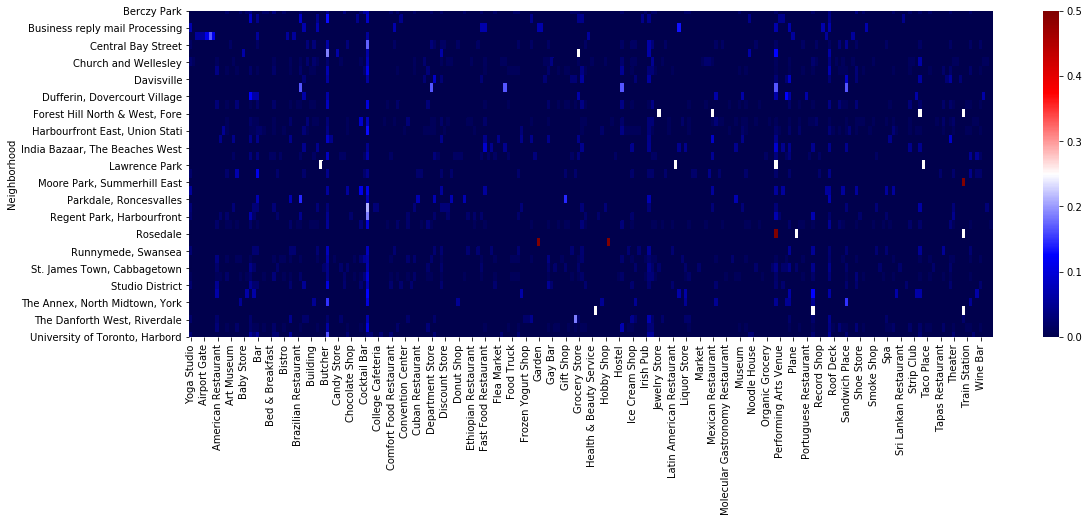

In [226]:
# Plot frequency dataframe with seaborn heatmap
f, ax = plt.subplots(figsize=(18, 6))
ax = sns.heatmap(boro_filt_grouped1, annot=False, cbar=True, cmap="seismic", vmin=0, vmax=.5)

#xticklabels=False, yticklabels=False
#cmap="YlGnBu"   linewidths=0.001
plt.show()

<h3> Observations:
    
    
   

 Overall, there are a lot of coffee shops in this area
    
    Rosedale and Roselawn are unique Garden and Park areas.
    
    Most areas fit in general dining, shopping areas
    
    

This notebook was modified by Joe McReynolds but created by [Alex Aklson](https://www.linkedin.com/in/aklson/) and [Polong Lin](https://www.linkedin.com/in/polonglin/). 